## **Spotify Wrapped: Detailed Overview.**


---



**Import the required libraries and modules.**

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsv
import numpy as np

import textwrap
from itertools import product

#### **Load the files.**

The data must be placed in the ```/spotify_data``` in order to be loaded.

In [87]:
import os

# Example assuming the folder is in the same directory as your notebook:
json_directory = "spotify_data" 

# Get a list of all JSON files in the directory that start with "Streaming_History_Audio_2025_"
json_files = [os.path.join(json_directory, f) 
              for f in os.listdir(json_directory) 
              if f.startswith("Streaming_History_Audio_2025_") and f.endswith(".json")]

# Read each JSON file into a DataFrame and concatenate them
df = pd.concat((pd.read_json(f) for f in json_files), ignore_index=True)

#### **Read the data.**

In [88]:
print("\n#### First 5 rows of the DataFrame: ####\n")
display(df.head())


#### First 5 rows of the DataFrame: ####



,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2025-01-06T23:56:34Z,android,4996,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy,spotify:track:7GgxAb6nyVReB3FFxtQWkV,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207789,False
1,2025-01-06T23:56:44Z,android,9073,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy,spotify:track:6bjYPIzpMjFhlYbgPhi8AP,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207794,False
2,2025-01-06T23:57:25Z,android,40913,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy,spotify:track:16wGHOPaWoat5rkAZkixxk,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207804,False
3,2025-01-06T23:57:26Z,android,1029,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Jazz presso,re:plus,Prayer,spotify:track:1HrS8TQFRwpo0Y7Xg5JqFv,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1736207845,False
4,2025-01-06T23:57:41Z,android,14673,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Migratory birds,re:plus,Prayer,spotify:track:0X58uodvlbESqAMKLnV2A7,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1736207846,False


The following table explains the technical fields required for this analysis:

| Technical field | Contains |
| :--- | :--- |
| **ts** | This field is a timestamp indicating when the track stopped playing in UTC (Coordinated Universal Time). Te order is year, month and day followed by a timestamp in military time |
| **ms_played** | This field is the number of milliseconds the stream was played. |
| **master_metadata_track_name** | This field is the name of the track. |
| **master_metadata_album_artist_name** | This field is the name of the artist, band or podcast. |
| **master_metadata_album_album_name** | This field is the name of the album of the track. |

####  **Select And Rename The Columns Required For This Analysis.**

In [89]:
df = df[["ts","ms_played", "master_metadata_track_name", "master_metadata_album_artist_name", "master_metadata_album_album_name"]]
df.rename(columns={
    "ts": "endTime",
    "ms_played": "msPlayed",
    "master_metadata_track_name": "trackName",
    "master_metadata_album_artist_name": "artistName",
    "master_metadata_album_album_name": "albumName"
    }, inplace=True)


print("\n#### Columns required for this analysis: ####\n")
display(df.head())


#### Columns required for this analysis: ####



,endTime,msPlayed,trackName,artistName,albumName
0,2025-01-06T23:56:34Z,4996,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy
1,2025-01-06T23:56:44Z,9073,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy
2,2025-01-06T23:57:25Z,40913,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy
3,2025-01-06T23:57:26Z,1029,Jazz presso,re:plus,Prayer
4,2025-01-06T23:57:41Z,14673,Migratory birds,re:plus,Prayer


#### **Check The Data Types Off The Columns.**

In [90]:
display(df.dtypes)

endTime       object
msPlayed       int64
trackName     object
artistName    object
albumName     object
dtype: object

#### **Convert The `endTime` To a Datetime Format And Add Two New Columns: `month` and `week`.**

In [91]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['month'] = df['endTime'].dt.month
df['week'] = df['endTime'].dt.to_period('W')

print("\n#### Final DataFrame:####\n")
display(df.head())


#### Final DataFrame:####



,endTime,msPlayed,trackName,artistName,albumName,month,week
0,2025-01-06 23:56:34+00:00,4996,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
1,2025-01-06 23:56:44+00:00,9073,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
2,2025-01-06 23:57:25+00:00,40913,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
3,2025-01-06 23:57:26+00:00,1029,Jazz presso,re:plus,Prayer,1,2025-01-06/2025-01-12
4,2025-01-06 23:57:41+00:00,14673,Migratory birds,re:plus,Prayer,1,2025-01-06/2025-01-12


#### **What Time Frame Does The Information Collected From Spotify Refer To?**

In [92]:
first_date = df['endTime'].dt.date.iloc[0]
last_date = df['endTime'].dt.date.iloc[-1]
print(f"The information obtained from Spotify pertains to the period from {first_date}, to {last_date}.")

The information obtained from Spotify pertains to the period from 2025-01-06, to 2025-09-20.


#### **How Much Data Does Spotify Collect Every Month?**

In [93]:
df_agg = df.groupby("month")
agg_artist_monthly = df_agg[['artistName','trackName']].nunique()

display(agg_artist_monthly)

,artistName,trackName
month,,
1,860,2714
2,916,2515
3,1410,4098
4,864,2435
5,1556,3683
6,1553,3425
7,2147,4692
8,1211,2631
9,366,815


Understanding the time period covered and the amount of data collected by Spotify, we can proceed with the analysis.


**Goals to be Completed:**

- Determine the **most listened-to artists/tracks overall** (measured in **minutes listened**).
- Analyze the **monthly performance** of the artists and tracks that are most listened to overall.
- Identify how many times the most listened-to artists/tracks appeared in the **top monthly/weekly**.
- Visualized **how the trends** of the most listened-to artists/tracks **change over the course** of months/weeks.
- Compare the **overall top list** with the list of artists/tracks that have been **consistently listened to over** weeks/months. Are there any **outliers** in the overall top list?

---

#### To avoid repeating code, the following functions generate the graphs needed for analysis.

In [157]:
def run_line_graph(data,x,hue_data,data_title,xlabel,time):
    """
    Create a Line Graph showing the performance of the most listened-to content monthly/weekly.
    """
    # Plotting the data
    plt.figure(figsize=(12, 5)) # Further increased figure size
    ax = snsv.lineplot(data=data, x=x, y='msPlayed', marker='o', hue=hue_data, linewidth=1.3, markersize=3)
    plt.title(data_title)
    plt.xlabel(xlabel)
    plt.ylabel('MsPlayed')

    # Set x-axis ticks to be integers
    plt.xticks(sorted(time.unique()))

    plt.xticks(rotation=45, ha='right') # Ensure x-axis labels are aligned correctly
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Keep legend outside the plot

    # Wrap the y-axis labels
    wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
    ax.set_yticks(ax.get_yticks()) # Set the ticks first
    ax.set_yticklabels(wrapped_labels)
    ax.set_ylim(bottom=0)

    plt.tight_layout()
    plt.show()

In [152]:
def run_subplots_graph(data, x_data, axis_label, suptitle, xticks):
    """
    Create a separate line chart for each value, ensuring that they do not overlap and making the trend of each value 
    """
    custom_palette = {
        'EXITED': '#D2042D',  
        'ENTERED': '#008000'  
    }

    # Plotting the data
    g = snsv.relplot(
        data=data, 
        x=x_data, 
        y='msPlayed', 
        col='facet_title', 
        hue='classification', 
        palette=custom_palette,        
        kind='line',         
        marker='o',
        col_wrap=1,         # Display one graphic per row to optimize space.
        height=3,           # The height of each subplot.
        aspect=3,        
    )

    # Adjust the titles and labels for clarity.
    g.set_axis_labels(axis_label, "MsPlayed")
    g.set_titles("{col_name}") 
    plt.suptitle(suptitle, y=1.02, fontsize=16)

    # Set up the X-axis for each subchart.
    for ax in g.axes.flat:
        # Make sure that the ticks represent complete week numbers.
        ax.set_xticks(sorted(xticks.unique()))
        ax.tick_params(axis='x', rotation=45) 

    g._legend.remove() 

    plt.tight_layout(rect=[0, 0, 1, 0.98]) 
    plt.show()

#### **The Most Listened-to Artists Overall (measured in msPlayed).**

In [138]:
top_artists = df.groupby(['artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()
top_artists = top_artists.sort_values(ascending=False, by="msPlayed").reset_index(drop=True).head(5)

print("\n#### Top most-listened artists overall: ####\n")
display(top_artists)


#### Top most-listened artists overall: ####



,artistName,msPlayed
0,The Beatles,328495363
1,Thee Michelle Gun Elephant,91063035
2,Patricio Rey y sus Redonditos de Ricota,83118557
3,Radiohead,56969054
4,The Smiths,55725821


#### **Percentage Of Time Spent Listening To The Top Artists**

In [139]:
total_msPlayed = df['msPlayed'].sum()

pct_time_top_artists = top_artists

pct_time_top_artists['percentage_of_time_listening'] = round((top_artists["msPlayed"] / total_msPlayed) * 100, 2)

print("\n#### Percentage of time spent listening to the top artists: ####\n")
display(pct_time_top_artists)


#### Percentage of time spent listening to the top artists: ####



,artistName,msPlayed,percentage_of_time_listening
0,The Beatles,328495363,13.29
1,Thee Michelle Gun Elephant,91063035,3.68
2,Patricio Rey y sus Redonditos de Ricota,83118557,3.36
3,Radiohead,56969054,2.30
4,The Smiths,55725821,2.25


#### **📈 Visualization: Most-Listened Artists Overall**

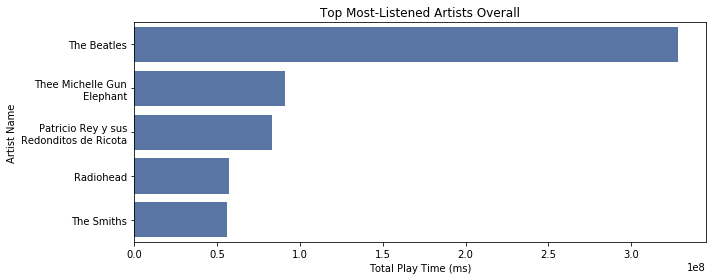

In [140]:
## Graph of the Most-Listened Artists ##
plt.figure(figsize=(10, 4))
ax = snsv.barplot(x='msPlayed', y='artistName', data=top_artists, color='#4c72b0')
plt.title('Top Most-Listened Artists Overall')
plt.xlabel('Total Play Time (ms)')
plt.ylabel('Artist Name')

# # Wrap the y-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks()) # Set the ticks first
ax.set_yticklabels(wrapped_labels)

ax.set_ylim(top=-0.5, bottom=len(top_artists) - 0.5)

plt.tight_layout()
plt.show()

### **Performance Of The Most Listened-to Artists Monthly.**

In [141]:
# 1. Calculate the total listening time for all artists and get the top
top_artists_list = df.groupby('artistName')['msPlayed'].sum().nlargest(5).index

# 2. Filter the monthly charts using this list of top artists
monthly_charts = df.groupby(['month', 'artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()

top_artists_recorded = monthly_charts[monthly_charts['artistName'].isin(top_artists_list)]

print("\n#### Performance of the top-most listened artists overall in the first month: ####\n")
display(top_artists_recorded.head())


#### Performance of the top-most listened artists overall in the first month: ####



,month,artistName,msPlayed
516,1,Patricio Rey y sus Redonditos de Ricota,32353675
551,1,Radiohead,944091
663,1,The Beatles,2759773
691,1,The Smiths,4788639
701,1,Thee Michelle Gun Elephant,20961558


#### **📈 Visualization: Performance Of The Most Listened-to Artists Overall Per Month.**

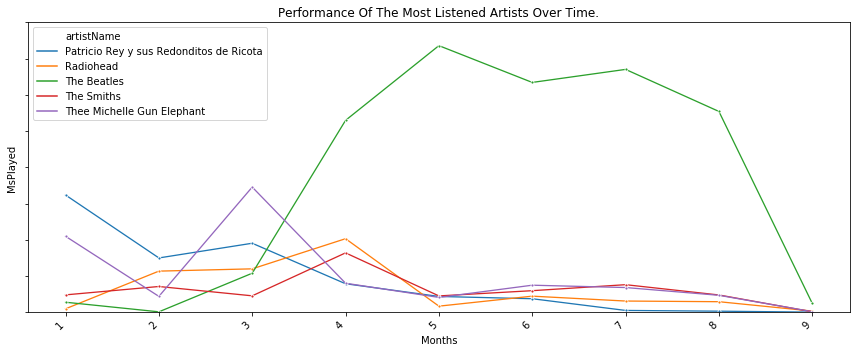

In [165]:
## Graph of the Most-Listened Artists per month ##

run_line_graph(
    data = top_artists_recorded,
    x = 'month',
    hue_data = 'artistName',
    data_title = 'Performance Of The Most Listened Artists Over Time.',
    xlabel = "Months",
    time = top_artists_recorded['month']
)


#### **What Were The Top Artists For Each Month?**

In [143]:
# Group by week and artist to get total count per artist per week
agg_artists_monthly = df.groupby(['month', 'artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# Find the top artists by total count for each week
top_artists_per_month = agg_artists_monthly.groupby('month', group_keys=False).apply(lambda x: x.nlargest(5, 'msPlayed')).reset_index(drop=True)

# for month, group in top_artists_per_month.groupby('month'):
#     print(f"\n#### Top most-listened artists in month {month}: ####\n")
#     print(group)

#### **How Many Times The Most Listened-to Artists Appeared In The Top Weekly Lists?**

In [144]:
top_artists_in_monthly_charts = top_artists_per_month[top_artists_per_month['artistName'].isin(top_artists['artistName'])]

top_artists_in_monthly_charts = top_artists_in_monthly_charts.groupby('artistName').agg(
    msPlayed=('msPlayed', 'sum'),
    count=('month', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

total_months = len(df['month'].unique())
top_artists_in_monthly_charts['percentage_of_months_in_top'] = round((top_artists_in_monthly_charts["count"] / total_months) * 100, 2)

print("\n#### Times the most listened-to artists appeared in the top monthly lists: ####\n")
display(top_artists_in_monthly_charts)


#### Times the most listened-to artists appeared in the top monthly lists: ####



,artistName,msPlayed,count,percentage_of_months_in_top
0,The Beatles,314861993,6,66.67
1,Thee Michelle Gun Elephant,77779598,5,55.56
2,Radiohead,43928736,4,44.44
3,The Smiths,34429534,4,44.44
4,Patricio Rey y sus Redonditos de Ricota,66376090,3,33.33


#### **Who Were The Most Listened-To Artists On The Weekly Charts?**

In [145]:
top_artists_from_monthly_charts = top_artists_per_month.groupby(['artistName',]).agg(
    msPlayed=('msPlayed', 'sum'),
    count=('month', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

top_artists_from_monthly_charts = top_artists_from_monthly_charts.nlargest(5, 'count').reset_index(drop=True)
top_artists_from_monthly_charts['percentage_of_weeks_in_top'] = round((top_artists_from_monthly_charts["count"] / total_months) * 100, 2)

print("\n#### The most listened-to artists on the weekly charts: ####\n")
display(top_artists_from_monthly_charts)


#### The most listened-to artists on the weekly charts: ####



,artistName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,314861993,6,66.67
1,Thee Michelle Gun Elephant,77779598,5,55.56
2,Radiohead,43928736,4,44.44
3,David Bowie,37490194,4,44.44
4,The Smiths,34429534,4,44.44


#### 📈 Visualization: Performance of the most-listened artists by top monthly over time.

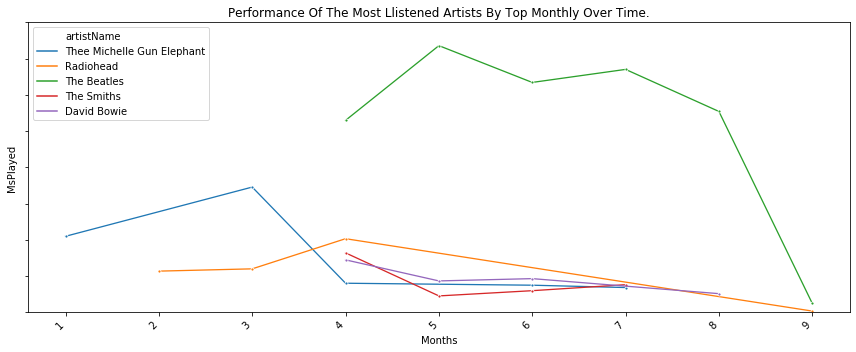

In [162]:
res = top_artists_per_month[top_artists_per_month["artistName"].isin(top_artists_from_monthly_charts["artistName"])]

run_line_graph(
    data = res,
    x = 'month',
    hue_data = 'artistName',
    data_title = 'Performance Of The Most Llistened Artists By Top Monthly Over Time.',
    xlabel = "Months",
    time = res['month']
)


#### **Differences Between The Top Artists By Listening Time and Weekly Charts.**

In [105]:
# Identify Entrants and Exits

# Artists that EXIT: Were in the Top by Listening Time, but fell out after the consistency weekly.
artists_exit = list(set(top_artists['artistName']) - set(top_artists_from_monthly_charts['artistName']))

# Artists that ENTER: Were outside the Top by Listening Time, but were boosted into the Top by consistency weekly.
artists_enter = list(set(top_artists_from_monthly_charts['artistName']) - set(top_artists['artistName']))

print(f"\n#### Artists that EXITED (Penalized for monthly Volatility): {artists_exit} ####\n")
print(f"\n#### Artists that ENTERED (Rewarded for monthly Consistency): {artists_enter} ####\n")


#### Artists that EXITED (Penalized for monthly Volatility): ['Patricio Rey y sus Redonditos de Ricota'] ####


#### Artists that ENTERED (Rewarded for monthly Consistency): ['David Bowie'] ####



#### **📈 Visualization:** Artists Who Entered And Exited The Top After Using Monthly Charts.

**1. Data Structuring for Plotting**

Create a temporary DataFrame containing only the moving artists and assign them a status label for color-coding the chart.

In [106]:
artists_to_plot = artists_exit + artists_enter

top_artists_monthly_recorded = agg_artists_monthly[agg_artists_monthly["artistName"].isin(artists_to_plot)]

#### **2. Generating the Line Chart**
Use a line chart to clearly contrast the penalized and rewarded artists based on weekly lists.

C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


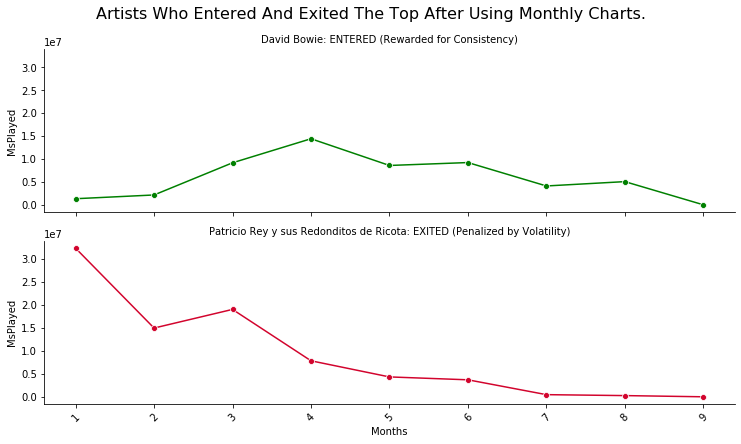

In [107]:
# Create a helper column to indicate the status (EXITED/ENTERED) for sorting purposes.
def get_classification(artist):
    if artist in artists_exit:  
        return "EXITED"
    elif artist in artists_enter:  
        return "ENTERED"
    return "N/A"

top_artists_monthly_recorded['classification'] = top_artists_monthly_recorded['artistName'].apply(get_classification)

# Add a column for the facet_title 
top_artists_monthly_recorded['facet_title'] = (
    top_artists_monthly_recorded['artistName'].astype(str) + 
    ': ' + 
    top_artists_monthly_recorded['classification'] + 
    top_artists_monthly_recorded['classification'].apply(lambda x: ' (Penalized by Volatility)' if x == 'EXITED' else ' (Rewarded for Consistency)')
)

run_subplots_graph(
    data = top_artists_monthly_recorded, 
    x_data = 'month', 
    axis_label = "Months", 
    suptitle = "Artists Who Entered And Exited The Top After Using Monthly Charts.", 
    xticks = top_artists_monthly_recorded['month']
)

#### **The Most Listened-to Tracks Overall (measured in msPlayed).**

In [108]:
top_tracks = df.groupby(['artistName',"trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()
top_tracks = top_tracks.sort_values(ascending=False, by="msPlayed").reset_index(drop=True).head(5)

print("\n#### Top most-listened tracks overall: ####\n")
display(top_tracks)


#### Top most-listened tracks overall: ####



,artistName,trackName,msPlayed
0,The Smiths,This Charming Man - 2011 Remaster,11196482
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937
2,Oasis,Supersonic - Remastered,9764319
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722
4,The Beatles,Hey Jude - Remastered 2015,8385826


#### **📈 Visualization: Most-Listened Tracks Overall**

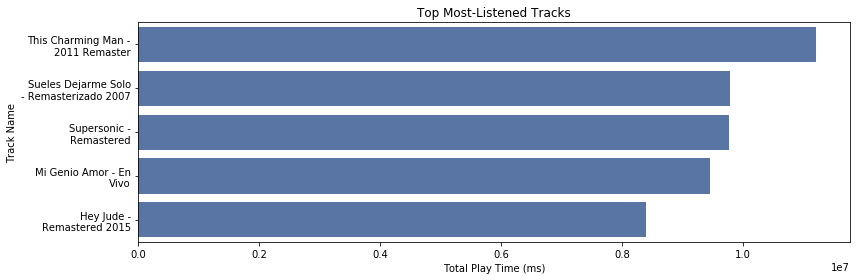

In [109]:
plt.figure(figsize=(12, 4))
ax = snsv.barplot(x='msPlayed', y='trackName', data=top_tracks, color='#4c72b0')
plt.title('Top Most-Listened Tracks')
plt.xlabel('Total Play Time (ms)')
plt.ylabel('Track Name')

# Wrap the y-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks()) # Set the ticks first
ax.set_yticklabels(wrapped_labels)

ax.set_ylim(top=-0.5, bottom=len(top_tracks) - 0.5)

plt.tight_layout()
plt.show()

#### **Percentage Of Time Spent Listening To The Top Tracks**

In [110]:
total_msPlayed = df['msPlayed'].sum()

pct_time_top_tracks = top_tracks

pct_time_top_tracks['percentage_of_time_listening'] = round((top_tracks["msPlayed"] / total_msPlayed) * 100, 2)

print("\n#### Percentage of time spent listening to the top tracks: ####\n")
display(pct_time_top_tracks[['artistName',"trackName","msPlayed","percentage_of_time_listening"]])


#### Percentage of time spent listening to the top tracks: ####



,artistName,trackName,msPlayed,percentage_of_time_listening
0,The Smiths,This Charming Man - 2011 Remaster,11196482,0.45
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937,0.40
2,Oasis,Supersonic - Remastered,9764319,0.40
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722,0.38
4,The Beatles,Hey Jude - Remastered 2015,8385826,0.34


### **Performance Of The Most Listened-to Tracks Weekly.**

In [111]:
# 1. Calculate the total listening time for all tracks and get the top
top_tracks_list = df.groupby(['artistName', "trackName"])['msPlayed'].sum().nlargest(5).index

# 3. Calculate the monthly charts
weekly_charts = df.groupby(['week', 'artistName', "trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()

top_tracks_recorded = weekly_charts[
    weekly_charts.set_index(['artistName', 'trackName']).index.isin(top_tracks_list)
].reset_index(drop=True)

# 4. Sort the result for better visualization
top_tracks_recorded = top_tracks_recorded.sort_values(by=['week', 'msPlayed', "trackName"], ascending=[True, False, True]).reset_index(drop=True)

print("\n#### Performance of the top-most listened tracks overall in the first week: ####\n")
display(top_tracks_recorded.head())


#### Performance of the top-most listened tracks overall in the first week: ####



,week,artistName,trackName,msPlayed
0,2025-01-06/2025-01-12,Oasis,Supersonic - Remastered,1363210
1,2025-01-06/2025-01-12,The Smiths,This Charming Man - 2011 Remaster,1302654
2,2025-01-06/2025-01-12,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,2032
3,2025-01-13/2025-01-19,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,861999
4,2025-01-13/2025-01-19,The Smiths,This Charming Man - 2011 Remaster,624326


#### **📈 Visualization: Performance Of The Most Listened-to Tracks Monthly.**

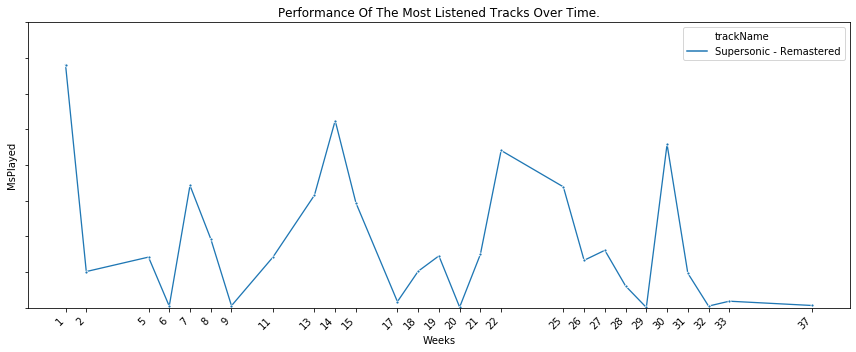

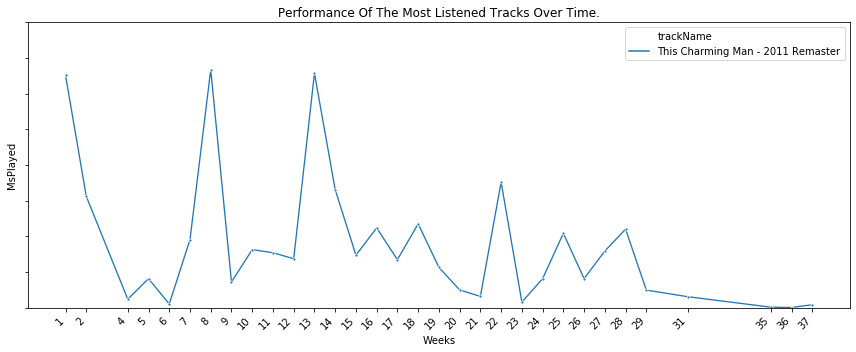

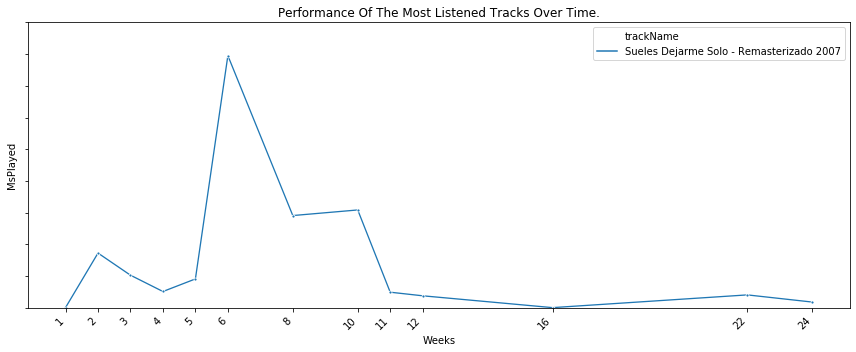

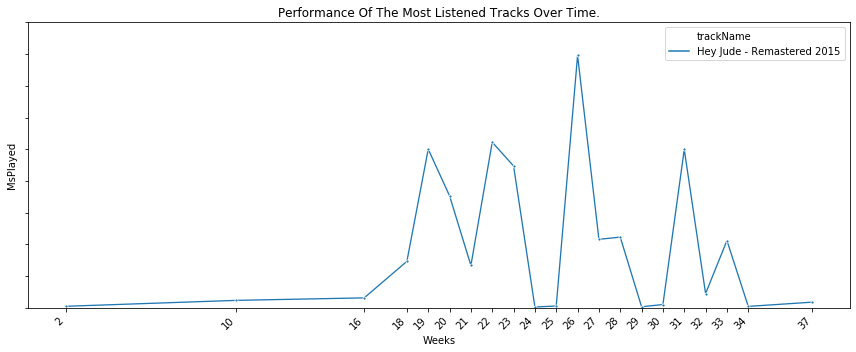

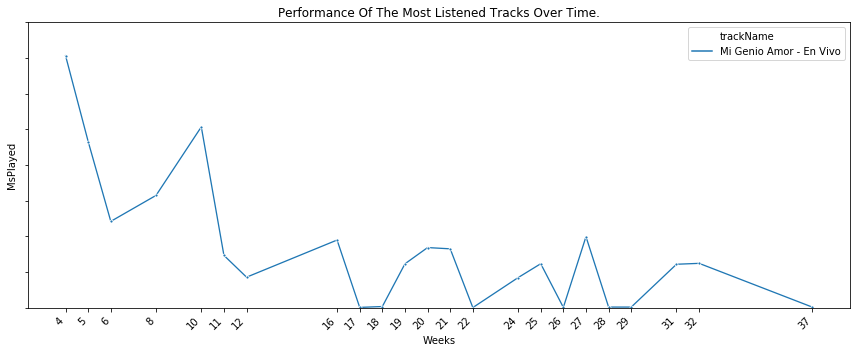

In [167]:
#  Get a list of all unique weeks
all_weeks = df['week'].astype(str).unique().tolist()

week_numbers_list = []
# Create pairs of (Original Month String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

top_tracks_recorded['sequential_week'] = top_tracks_recorded['week'].astype(str).map(week_to_number_map)

top_tracks_name = top_tracks_recorded[['artistName',"trackName"]].drop_duplicates().values



for track_name in top_tracks_name:
    
    # 1. FILTERED: Get the DataFrame for only the current artist
    mask = (top_tracks_recorded['artistName'] == track_name[0]) & \
           (top_tracks_recorded['trackName'] == track_name[1])
           
    df_target_track = top_tracks_recorded[mask].reset_index(drop=True) 
    
    run_line_graph(
      data = df_target_track,
       x = 'sequential_week',
       hue_data = 'trackName',
       data_title = 'Performance Of The Most Listened Tracks Over Time.',
       xlabel = "Weeks",
       time = df_target_track['sequential_week']
     )    

#### **What Were The Top Tracks For Each Week?**

In [113]:
# Group by week and track to get total count per week
agg_tracks_weekly = df.groupby(['week', 'artistName',"trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# Find the top tracks by total count for each week
top_tracks_per_week = agg_tracks_weekly.groupby('week', group_keys=False).apply(lambda x: x.nlargest(5, 'msPlayed')).reset_index(drop=True)

# for week, group in top_tracks_per_week.groupby('week'):
#     print(f"\n#### Top most-listened tracks in week {week}: ####\n")
#     print(group)

#### **How Many Times The Most Listened-to Tracks Appeared In The Top Weekly Lists?**

In [114]:
top_tracks['combined_key'] = list(zip(top_tracks['artistName'], top_tracks['trackName']))
top_tracks_per_week['combined_key'] = list(zip(top_tracks_per_week['artistName'], top_tracks_per_week['trackName']))

top_tracks_in_weekly_charts = top_tracks_per_week[top_tracks_per_week['combined_key'].isin(top_tracks['combined_key'])]

top_tracks_in_weekly_charts = top_tracks_in_weekly_charts.groupby(['artistName',"trackName"]).agg(
    msPlayed=('msPlayed', 'sum'),
    count=('combined_key', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

total_weeks = len(df['week'].unique())
top_tracks_in_weekly_charts['percentage_of_weeks_in_top'] = round((top_tracks_in_weekly_charts["count"] / total_weeks) * 100, 2)

print("\n#### Times the most listened-to tracks appeared in the top weekly lists?: ####\n")
display(top_tracks_in_weekly_charts)


#### Times the most listened-to tracks appeared in the top weekly lists?: ####



,artistName,trackName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,Hey Jude - Remastered 2015,4528894,4,10.81
1,The Smiths,This Charming Man - 2011 Remaster,3342202,3,8.11
2,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,5429491,2,5.41
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,2932279,2,5.41
4,Oasis,Supersonic - Remastered,2244984,2,5.41


#### **Who Were The Most Listened-To Tracks On The Weekly Charts?**

In [115]:
top_tracks_from_weekly_charts = top_tracks_per_week.groupby(['artistName',"trackName"]).agg(
    msPlayed=('msPlayed', 'sum'),
    count=('combined_key', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

top_tracks_from_weekly_charts = top_tracks_from_weekly_charts.nlargest(5, 'count').reset_index(drop=True)
top_tracks_from_weekly_charts['percentage_of_weeks_in_top'] = round((top_tracks_from_weekly_charts["count"] / total_weeks) * 100, 2)


print("\n#### The most listened-to tracks on the weekly charts: ####\n")
display(top_tracks_from_weekly_charts)


#### The most listened-to tracks on the weekly charts: ####



,artistName,trackName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,Hey Jude - Remastered 2015,4528894,4,10.81
1,David Bowie,Space Oddity - 2015 Remaster,3692385,3,8.11
2,The Smiths,This Charming Man - 2011 Remaster,3342202,3,8.11
3,The Beatles,Come Together - 2019 Mix,3190737,3,8.11
4,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,5429491,2,5.41


C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


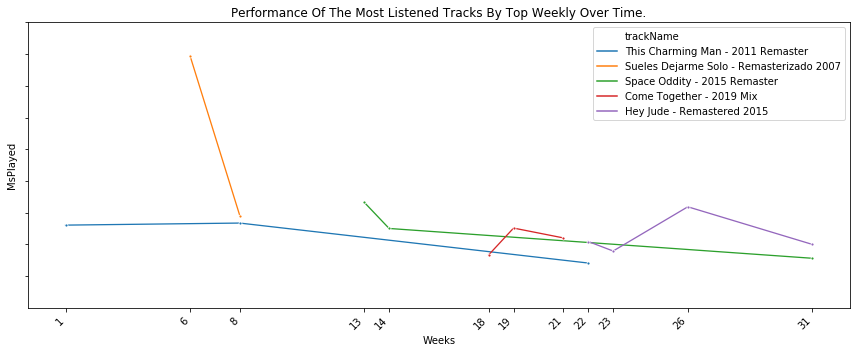

In [166]:
top_tracks_from_weekly_charts['combined_key'] = list(zip(top_tracks_from_weekly_charts['artistName'], top_tracks_from_weekly_charts['trackName']))

res = top_tracks_per_week[top_tracks_per_week['combined_key'].isin(top_tracks_from_weekly_charts['combined_key'])]

all_weeks = df['week'].astype(str).unique().tolist()

week_numbers_list = []
# Create pairs of (Original Month String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

res['sequential_week'] = res['week'].astype(str).map(week_to_number_map)

run_line_graph(
      data = res,
      x = 'sequential_week',
      hue_data = 'trackName',
      data_title = 'Performance Of The Most Listened Tracks By Top Weekly Over Time.',
      xlabel = "Weeks",
      time = res['sequential_week']
)   

#### **Differences Between The Top Tracks By Listening Time and Weekly Charts.**

In [117]:
top_tracks_from_weekly_charts_copy = top_tracks_from_weekly_charts.copy()
top_tracks_copy = top_tracks.copy()

top_tracks_copy["combined_key"] = list(zip(top_tracks['artistName'], top_tracks['trackName']))
top_tracks_from_weekly_charts_copy["combined_key"] = list(zip(top_tracks_from_weekly_charts['artistName'], top_tracks_from_weekly_charts['trackName']))

# Identify Entrants and Exits

# Tracks that EXIT: Were in the Top by Listening Time, but fell out after the consistency weekly.
tracks_exit = list(set(top_tracks_copy['combined_key']) - set(top_tracks_from_weekly_charts_copy['combined_key']))

# Tracks that ENTER: Were outside the Top by Listening Time, but were boosted into the Top by consistency weekly.
tracks_enter = list(set(top_tracks_from_weekly_charts_copy['combined_key']) - set(top_tracks_copy['combined_key']))

print(f"\n#### Tracks that EXITED (Penalized for Weekly Volatility): {tracks_exit} ####\n")
print(f"\n#### Tracks that ENTERED (Rewarded for Weekly Consistency): {tracks_enter} ####\n")


#### Tracks that EXITED (Penalized for Weekly Volatility): [('Oasis', 'Supersonic - Remastered'), ('Los Fundamentalistas del Aire Acondicionado', 'Mi Genio Amor - En Vivo')] ####


#### Tracks that ENTERED (Rewarded for Weekly Consistency): [('The Beatles', 'Come Together - 2019 Mix'), ('David Bowie', 'Space Oddity - 2015 Remaster')] ####



In [118]:
tracks_to_plot = tracks_exit + tracks_enter

agg_tracks_weekly["combined_key"] = list(zip(agg_tracks_weekly['artistName'], agg_tracks_weekly['trackName'])) 

# 1. Get a list of all unique months
all_weeks = df['week'].astype(str).unique().tolist()
# agg_tracks_weekly['week'] = agg_tracks_weekly['week'].astype(str)

# # 2. Create a DataFrame with all combinations of top artists and months
# full_grid = pd.DataFrame(product(all_weeks, tracks_to_plot), columns=['week', "combined_key"])

# 3. Left merge the full grid with the monthly data
top_tracks_weekly_recorded = agg_tracks_weekly[agg_tracks_weekly["combined_key"].isin(tracks_to_plot)]

# 4. Fill NaN values with 0
top_tracks_weekly_recorded['msPlayed'] = top_tracks_weekly_recorded['msPlayed'].fillna(0)

week_numbers_list = []

# Create pairs of (Original Week String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

top_tracks_weekly_recorded['sequential_week'] = top_tracks_weekly_recorded['week'].astype(str).map(week_to_number_map)

C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


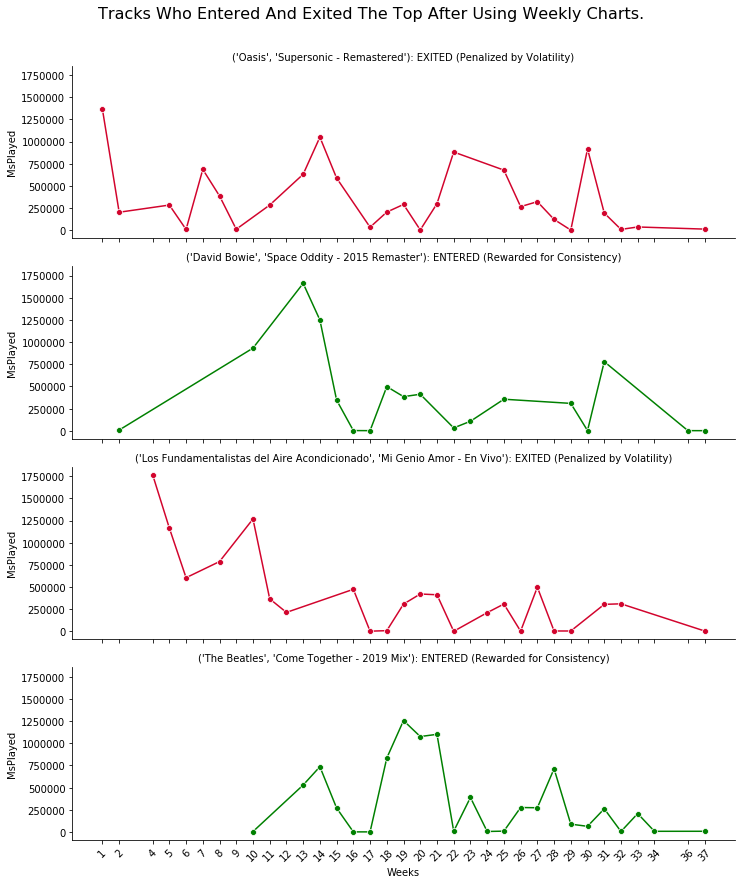

In [119]:
# Create a helper column to indicate the status (EXITED/ENTERED) for sorting purposes.
def get_classification(track):
    if track in tracks_exit:  
        return "EXITED"
    elif track in tracks_enter:  
        return "ENTERED"
    return "N/A"

top_tracks_weekly_recorded['classification'] = top_tracks_weekly_recorded['combined_key'].apply(get_classification)

# Add a column for the facet_title 
top_tracks_weekly_recorded['facet_title'] = (
    top_tracks_weekly_recorded['combined_key'].astype(str) + 
    ': ' + 
    top_tracks_weekly_recorded['classification'] + 
    top_tracks_weekly_recorded['classification'].apply(lambda x: ' (Penalized by Volatility)' if x == 'EXITED' else ' (Rewarded for Consistency)')
)



run_subplots_graph(
    data = top_tracks_weekly_recorded, 
    x_data = 'sequential_week', 
    axis_label = "Weeks", 
    suptitle = "Tracks Who Entered And Exited The Top After Using Weekly Charts.", 
    xticks = top_tracks_weekly_recorded['sequential_week']
)

#### Recapitulation
---

#### The Most Listened-to Artists Overall (measured in msPlayed).

In [120]:
display(top_artists)

,artistName,msPlayed,percentage_of_time_listening
0,The Beatles,328495363,13.29
1,Thee Michelle Gun Elephant,91063035,3.68
2,Patricio Rey y sus Redonditos de Ricota,83118557,3.36
3,Radiohead,56969054,2.30
4,The Smiths,55725821,2.25


#### Who Were The Most Listened-To Artists On The Monthly Charts? (Consistency Consumption)

In [121]:
display(top_artists_from_monthly_charts)

,artistName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,314861993,6,66.67
1,Thee Michelle Gun Elephant,77779598,5,55.56
2,Radiohead,43928736,4,44.44
3,David Bowie,37490194,4,44.44
4,The Smiths,34429534,4,44.44


#### Differences Between The Top Artists By Listening Time and Weekly Charts. (Consistency vs. Atypical Consumption)

In [122]:
print(f"Artists that EXITED (Penalized for monthly Volatility): {artists_exit}")
print(f"\nArtists that ENTERED (Rewarded for monthly Consistency): {artists_enter}")

Artists that EXITED (Penalized for monthly Volatility): ['Patricio Rey y sus Redonditos de Ricota']

Artists that ENTERED (Rewarded for monthly Consistency): ['David Bowie']


#### The Most Listened-to Tracks Overall (measured in msPlayed).

In [123]:
display(top_tracks[["artistName","trackName","msPlayed","percentage_of_time_listening"]])

,artistName,trackName,msPlayed,percentage_of_time_listening
0,The Smiths,This Charming Man - 2011 Remaster,11196482,0.45
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937,0.40
2,Oasis,Supersonic - Remastered,9764319,0.40
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722,0.38
4,The Beatles,Hey Jude - Remastered 2015,8385826,0.34


#### Who Were The Most Listened-To Tracks On The Weekly Charts? (Consistency Consumption)

In [124]:
display(top_tracks_from_weekly_charts[["artistName","trackName","msPlayed","count","percentage_of_weeks_in_top"]])

,artistName,trackName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,Hey Jude - Remastered 2015,4528894,4,10.81
1,David Bowie,Space Oddity - 2015 Remaster,3692385,3,8.11
2,The Smiths,This Charming Man - 2011 Remaster,3342202,3,8.11
3,The Beatles,Come Together - 2019 Mix,3190737,3,8.11
4,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,5429491,2,5.41


#### Differences Between The Top Tracks By Listening Time and Weekly Charts. (Consistency vs. Atypical Consumption)

In [125]:
print(f"Tracks that EXITED (Penalized for Weekly Volatility): {tracks_exit}")
print(f"\nTracks that ENTERED (Rewarded for Weekly Consistency): {tracks_enter}")

Tracks that EXITED (Penalized for Weekly Volatility): [('Oasis', 'Supersonic - Remastered'), ('Los Fundamentalistas del Aire Acondicionado', 'Mi Genio Amor - En Vivo')]

Tracks that ENTERED (Rewarded for Weekly Consistency): [('The Beatles', 'Come Together - 2019 Mix'), ('David Bowie', 'Space Oddity - 2015 Remaster')]


#### **First Impressions:**

- The top **five artists** were responsible for **approximately 25%** of the **total listening time this year to date.**
- In **contrast**, the **top five most-listened tracks** accounted for **only 2%** of the **overall listening time year to date.**
- The dataframe includes **37 weeks** of listening history; however, **only two or three weeks** in the **weekly top chart** are **necessary** to **rank tracks consistently.**

Initial conclusion: 
- **More reliable methods are necessary** to identify the "*most consistently played*" tracks rather than just counting their appearances in weekly or monthly top charts.

### **First Model: Simple Exponential Smoothing (SES)**

1. **Why SES?**  because it functions as a **Long Memory Filter**, assigning **less weight** to the **current month** and **more weight** to historical data. This approach enables the model to disregard impulsive spikes and measure an artist's **momentum** and long-term loyalty.

In [126]:
agg_track_weekly = df.groupby(['week', 'artistName', 'trackName']).agg(
    msPlayed=('msPlayed', 'sum')
).reset_index()

all_weeks = df['week'].astype(str).unique().tolist()

week_numbers_list = []

# Create pairs of (Original Month String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

agg_track_weekly['sequential_week'] = agg_track_weekly['week'].astype(str).map(week_to_number_map)

# 1. Pivotear la data para crear la Serie Temporal Completa
#   - Índice: Tracks (Canción y Artista)
#   - Columnas: Semanas (37)
#   - .fillna(0) es CRUCIAL: Convierte las semanas de AUSENCIA en 0 msPlayed,
#     penalizando la falta de constancia en el suavizado.
track_time_series = agg_track_weekly.pivot_table(
    index=['artistName', 'trackName'],
    columns='sequential_week',
    values='msPlayed'
).fillna(0)


# 2. Apply the Exponential Weighted Moving Average (SES) row-wise
# Assign 30% weight to the current week and 70% weight to history.
alpha = 0.3

# Transpose the table so that the weeks serve as the index, and calculate the smoothing sequentially over time.
smoothed_time_series = track_time_series.T.ewm(
    alpha=alpha,
    adjust=False
).mean().T # Transpose back to the original format

# 3. Consolidate the Consistency Ranking

# Calculate the average smoothed level over the weeks.
final_ranking = smoothed_time_series.mean(axis=1).reset_index(name='Avg_Smoothed_Level')

# 4. Add metrics for comparison (Total msPlayed and Weeks Presented)

# Total msPlayed (for comparison with the global top)
total_minutes = agg_track_weekly.groupby(['artistName', 'trackName']).agg(
    msPlayed=('msPlayed', 'sum')
).reset_index()

final_ranking = pd.merge(
    final_ranking,
    total_minutes,
    on=['artistName', 'trackName']
)

# Present Weeks (to verify consistency)
weeks_present = agg_track_weekly.groupby(['artistName', 'trackName'])['week'].count().reset_index(name='Weeks_Present')
final_ranking = pd.merge(final_ranking, weeks_present, on=['artistName', 'trackName'])

top_constant_tracks = final_ranking.sort_values(
    by='Avg_Smoothed_Level',
    ascending=False
).head(5).reset_index()


print("\n#### Top 5 Constant Tracks (using SES) ####")
display(top_constant_tracks[
    ['artistName', 'trackName', 'msPlayed', 'Avg_Smoothed_Level', 'Weeks_Present']
])


#### Top 5 Constant Tracks (using SES) ####


,artistName,trackName,msPlayed,Avg_Smoothed_Level,Weeks_Present
0,The Smiths,This Charming Man - 2011 Remaster,11196482,383330.059667,32
1,Oasis,Supersonic - Remastered,9764319,346910.464769,27
2,Blur,Girls & Boys - 2012 Remaster,6230004,289091.148501,21
3,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937,264492.205377,13
4,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722,253190.675885,23


#### Is "Sueles Dejarme Solo" one of my most consistently listened to tracks?

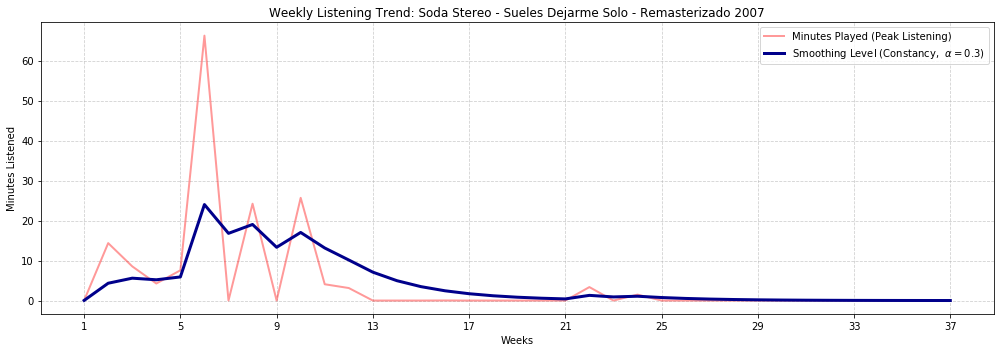


Is 'Sueles Dejarme Solo' one of my most consistently listened to tracks?
'Sueles Dejarme Solo' completely disappears from weekly listeners after week 13.


In [127]:
# a) Extract the smoothed series of the track
soda_stereo_smoothed = smoothed_time_series.loc[('Soda Stereo', 'Sueles Dejarme Solo - Remasterizado 2007')]

soda_stereo_df = soda_stereo_smoothed.reset_index()
soda_stereo_df.columns = ['sequential_week', 'Smoothed_Level']
soda_stereo_df["artistName"] = "Soda Stereo"

# b) Extract the weekly playback history of the track
soda_stereo_weekly = agg_track_weekly[
    (agg_track_weekly["artistName"] == "Soda Stereo") & 
    (agg_track_weekly["trackName"] == "Sueles Dejarme Solo - Remasterizado 2007")]

soda_stereo_weekly = soda_stereo_weekly[['sequential_week', 'msPlayed']]

# c) Merge the series 
combined_soda_stereo = pd.merge(
    soda_stereo_df,
    soda_stereo_weekly,
    on='sequential_week',
    how='left'  # Ensure all rows in soda_stereo_df are preserved
)

# d) Fill missing values (NaN) in the 'msPlayed' column with zero for the weeks without any listening activity
combined_soda_stereo['msPlayed_Real'] = combined_soda_stereo['msPlayed'].fillna(0)

# Convert msPlayed to minutes
combined_soda_stereo['Min_Real'] = combined_soda_stereo['msPlayed_Real'] / 60000
combined_soda_stereo['Min_Smoothed'] = combined_soda_stereo['Smoothed_Level'] / 60000



## Chart Weekly Listening Trend ##

plt.figure(figsize=(14, 5))

# Listening Line (Volatility and Spikes)
snsv.lineplot(x='sequential_week', y='Min_Real', data=combined_soda_stereo, 
             label='Minutes Played (Peak Listening)', 
             color='red', 
             alpha=0.4, 
             linewidth=2)

# Smoothing Level Line (Constancy/Inertia)
snsv.lineplot(x='sequential_week', y='Min_Smoothed', data=combined_soda_stereo, 
             label=f'Smoothing Level (Constancy,  $\\alpha=0.3$)', 
             color='darkblue', 
             linewidth=3)

title_text = f'Weekly Listening Trend: Soda Stereo - Sueles Dejarme Solo - Remasterizado 2007'
plt.title(title_text)
plt.xlabel("Weeks")
plt.ylabel("Minutes Listened")
plt.xticks(np.arange(1, 38, 4)) # Marks every 4 weeks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()


plt.show()


print("\nIs 'Sueles Dejarme Solo' one of my most consistently listened to tracks?")
print("'Sueles Dejarme Solo' completely disappears from weekly listeners after week 13.")

The track "Sueles Dejarme Solo" sees a nearly complete drop in my weekly listeners after week 13. The total number of streams over those weeks creates a pronounced **"tail" in the smoothed average**, which surpasses many songs that have been listened to more consistently throughout the year. So, it stands out as an **outlier** at the top of the list of consistently popular songs.

In **conclusion**, when using only the SES model, **outliers continue to drop out of the top constant listened rankings**.

After several attempts, it was decided to use a model to measure and rank **consistency, volatility, and relevance:**

$$\mathbf{P_{Final}} = S_{t_{\text{norm}}} \times \left( \frac{1}{1 + \sigma_{\text{norm}}} \right) \times (\text{Total}_{\text{norm}}) \times \text{Decay}_{\text{Factor}}$$

The steps outlined below explain the implementation process and provide the rationale for each model parameter.

#### 1. Constructing the Weekly Time Series

This step is necessary for calculating the Volatility ($\sigma$) and the Decay Factor.

In [128]:
# 1. Unpivot and create the Weekly Listening Time Series (including weeks without listening)
real_time_series_long = track_time_series.reset_index().melt(
    id_vars=['artistName', 'trackName'],
    var_name='sequential_week',
    value_name='msPlayed'
)

# 2. Unpivot and create the Smoothed Time Series
smoothed_time_series_long = smoothed_time_series.reset_index().melt(
    id_vars=['artistName', 'trackName'],
    var_name='sequential_week',
    value_name='Smoothed_Level'
)

# 3. Join both series in the dataframe
ranking_by_inertia = pd.merge(
    real_time_series_long,
    smoothed_time_series_long,
    on=['artistName', 'trackName', 'sequential_week']
)

#### 2. Calculation of the Volatility (Sigma)

In this step, you need to calculate the standard deviation of weekly listening time (msPlayed) for each song.

**What is standard deviation?**

The standard deviation measures **how far individual values** in a data set typically deviate from the mean (average).

- A **high standard deviation** (σ) indicates that the data points are widely dispersed and far from the average, suggesting **high volatility** or inconsistent patterns.
- A **low standard deviation** (σ) shows that the data points are close to the average, indicating **low volatility** or consistent patterns.

**In this case, a low standard deviation is desirable because it reflects a regular consumption pattern.**

**Summary:** This step assesses **how inconsistently** each song is listened to every week.

In [129]:
# 1. Calculate the standard deviation (Sigma) of actual listening
volatility_df = ranking_by_inertia.groupby(['artistName', 'trackName']).agg(
    Sigma=('msPlayed', 'std')
).reset_index()

# 2. Join this metric to the main dataframe
final_ranking = pd.merge(
    final_ranking,
    volatility_df,
    on=['artistName', 'trackName'],
    how='left'
)

**3. Calculate the Decay Factor**

This calculation is used to penalize a sustained decrease in consumption toward the end of the analysis period.

The decay factor is determined by comparing the maximum level of stability a song has reached (its smoothed peak) with its current level of stability (its value from the last week).

**How does the penalty work?**

- If consumption remains constant and has not decreased, the final value ($St_{final}$) will be very close to its peak ($St_{peak}$). In this case, the decay factor will be close to 1, meaning the final score is not penalized.

- Conversely, if a song experienced high consumption at the beginning but was completely abandoned later (resulting in the final value being almost zero or very low), the decay factor will be very small, leading to a significant penalty on the final score. 

This calculation should penalize songs like the Soda Stereo song, where consumption peaked early, and the final value dropped close to zero.

In [130]:
# --- Calculate the Decay Factor ---

# 1. Determine the final and peak values for each track (St_final and St_peak).
decay_metrics = ranking_by_inertia.groupby(['artistName', 'trackName']).agg(
    St_final=('Smoothed_Level', 'last'),
    St_peak=('Smoothed_Level', 'max')
).reset_index()

# 2. Calculate the Decay Factor and apply a lower bound to clip the values.
decay_metrics['Decay_Factor'] = (
    decay_metrics['St_final'] / decay_metrics['St_peak']
).clip(lower=0.1) # avoid division by zero

# 3. Merge the Decay Factor into the main data frame.
final_ranking = pd.merge(
    final_ranking,
    decay_metrics[['artistName', 'trackName', 'Decay_Factor']],
    on=['artistName', 'trackName'],
    how='left'
)

#### 4. Normalization####

Normalization converts the original values—such as "msPlayed" in milliseconds, which can range from 0 to 1,000,000—into a new scale that ranges from **0 to 1.**

Without normalization, the metric with the largest absolute value (likely msPlayed) **would overshadow the others**, rendering SES and σ irrelevant.

The **Min-Max Scaling** technique will be used.

**Normalization Logic:**

- A value of 1 indicates the **highest stability** in habits or the **loudest listening volume** across the entire data frame.

- A value of 0 signifies the **highest volatility**, representing the most erratic pattern in the entire data frame.

In [131]:
# --- Normalization ---

# 1. Normalize SES (Quality Base) - Maximum is better
final_ranking['St_norm'] = (
    final_ranking['Avg_Smoothed_Level'] - final_ranking['Avg_Smoothed_Level'].min()
) / (
    final_ranking['Avg_Smoothed_Level'].max() - final_ranking['Avg_Smoothed_Level'].min()
)

# 1. Normalize Total (Relevance Factor) - Máximum is better
final_ranking['Total_norm'] = (
    final_ranking['msPlayed'] - final_ranking['msPlayed'].min()
) / (
    final_ranking['msPlayed'].max() - final_ranking['msPlayed'].min()
)

# 2. Normalize Sigma (Volatility) - Minimum is better
final_ranking['Sigma_norm'] = (
    final_ranking['Sigma'] - final_ranking['Sigma'].min()
) / (
    final_ranking['Sigma'].max() - final_ranking['Sigma'].min()
)

# The penalty logic will be applied in the final formula, not in this section.

#### Calculation of the Final Score ($P_{Final}$)


$$\mathbf{P_{Final}} = S_{t_{\text{norm}}} \times \left( \frac{1}{1 + \sigma_{\text{norm}}} \right) \times (\text{Total}_{\text{norm}}) \times \text{Decay}_{\text{Factor}}$$

#### Formula explanation:

| Symbol | Component | Function in the Model |
| :--- | :--- | :--- |
| $\mathbf{P_{Final}}$ | Final Score | The **Adjusted Ranking** for Sustained Consistency. |
| $S_{t_{\text{norm}}}$ | **Quality Base (SES)** | Measures **Inertia** and **Habit Stability** (the quality of the pattern). |
| $\sigma_{\text{norm}}$ | **Volatility (Standard Deviation)** | Measures the **Risk** that consumption was impulsive or erratic. |
| $\left( \frac{1}{1 + \sigma_{\text{norm}}} \right)$ | **Risk Factor** | The **Discount** that directly penalizes the volatile artist. |
| $\text{Total}_{\text{norm}}$ | **Relevance Factor** | Ensures the artist has the **Minimum Volume** necessary to compete.
| $\text{Decay}_{\text{Factor}}$ | **Decay Penalty Factor** | Penalizes the habit's sustained **abandonment**.

The result of this calculation will reward only songs that demonstrate **high pattern quality** ($S_t$), **low volatility** (low $\sigma$), **high consumption** (total), and **no sustained dropout** (High $Decay_{Factor}$).

In [132]:
# --- Final Calculation ---

# P_Final = St_norm * (1 / (1 + Sigma_norm)) * Total_norm * Decay_Factor
final_ranking['P_Final'] = (
    final_ranking['St_norm'] *                 # Quality Base (Inertia)
    (1 / (1 + final_ranking['Sigma_norm'])) *  # Risk Factor (Volatility Penalty)
    final_ranking['Total_norm'] *              # Relevance Factor (Minimum Volume) 
    final_ranking['Decay_Factor']              # Decay Penalty (Recent Abandonment)
)

# Generate the Final Ranking
top_triple_filter_tracks = final_ranking.sort_values(
    by=['P_Final',"Total_norm"],
    ascending=[False,False]
)

In [133]:
print("\n#### Final Ranking: Top Tracks Based on Sustained Habit Score ####")
display(top_triple_filter_tracks[
    ['artistName',
     'trackName',
     'Weeks_Present',
     'P_Final',
     'St_norm',
     'Sigma_norm',
     'Decay_Factor',
     'msPlayed',
    ]
].head(5).reset_index(drop=True))


#### Final Ranking: Top Tracks Based on Sustained Habit Score ####


,artistName,trackName,Weeks_Present,P_Final,St_norm,Sigma_norm,Decay_Factor,msPlayed
0,The Smiths,This Charming Man - 2011 Remaster,32,0.066627,1.000000,0.500896,0.100000,11196482
1,Oasis,Supersonic - Remastered,27,0.053205,0.904992,0.483381,0.100000,9764319
2,The Beatles,I Saw Her Standing There - 2023 Mix,21,0.042241,0.510018,0.378753,0.171333,7462351
3,The Beatles,Hey Jude - Remastered 2015,21,0.040858,0.573903,0.548469,0.147188,8385826
4,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,23,0.035644,0.660503,0.563972,0.100000,9449722


**Why were these parameters used in the calculation?**

**Simple Exponential Smoothing (SES)**:
- **Disadvantage**: While SES smooths out peaks, it does not penalize them adequately. This means that a track known for its volatility may still exhibit a pronounced historical trend in cumulative consumption.

**Penalizing Volatility with Standard Deviation (σ)**:
- **Advantage**: The standard deviation is a direct measure of volatility.
- **Disadvantage**: Consistency does not equal relevance. Using the standard deviation alone does not ensure that a track is genuinely significant. For instance, a track with a perfectly consistent pattern, even if it has very low consumption levels, could still rank highly.

**Total (Sum of msPlayed)**:
- **Advantage**: This metric helps ensure that consistency remains at a relevant level.

Although the parameters addressed issues of **volatility** (σ) and **irrelevance** (total), an unresolved problem emerged: **Abandonment**.

For example, a song that had consistent consumption early in the year (like Soda Stereo's "Sueles Dejarme Solo") could rank highly because:
- It cultivated a **strong initial habit** ($S_t$ high).
- Its decline was **smooth** and non-volatile, resulting in a **low risk factor** (σ).

The previous parameters rewarded the recall of habits without penalizing prolonged abandonment, which indicates a lack of relevance. 

To address this, a **decay penalty factor** has been introduced. 

This adjustment ensures that the maximum score is awarded only to those who demonstrate **high consistency**, **low volatility**, and **no extended periods of abandonment.**

#### 📈 Visualization:  Representation of the contribution of the factors to the Sustained Habit Score.

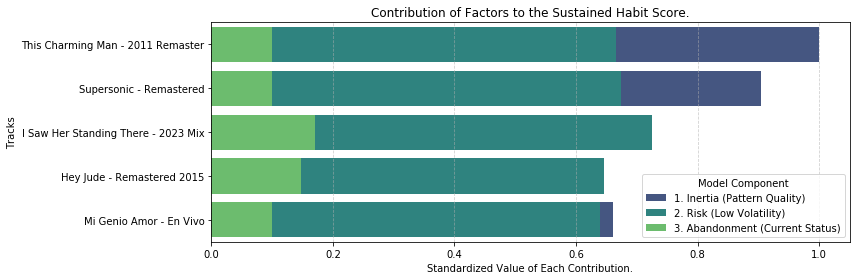

In [134]:
top_tracks = top_triple_filter_tracks.head(5).copy()

# Create a column representing the 'Risk Factor' to graph
top_tracks['Risk_Factor'] = 1 / (1 + top_tracks['Sigma_norm'])

# Select the main factors columns for the chart
plot_data = top_tracks[[
    'artistName',
    'trackName',
    'St_norm',        
    'Risk_Factor',    
    'Decay_Factor'    
]].copy()

# # Remove redundant columns and prepare "long" format for sns.barplot
plot_data = plot_data.melt(
    id_vars='trackName',
    value_vars=['St_norm', 'Risk_Factor', 'Decay_Factor'],
    var_name='Factor',
    value_name='Normalized_Value'
)


# --- Visualization ---


plt.figure(figsize=(12, 4))

# Map the factor names to the legend
factor_mapping = {
    'St_norm': '1. Inertia (Pattern Quality)',
    'Risk_Factor': '2. Risk (Low Volatility)',
    'Decay_Factor': '3. Abandonment (Current Status)'
}
plot_data['Factor'] = plot_data['Factor'].map(factor_mapping)


ax = snsv.barplot(
    x='Normalized_Value',
    y='trackName',
    hue='Factor',
    data=plot_data,
    palette='viridis',  
    dodge=False         
)

plt.title('Contribution of Factors to the Sustained Habit Score.')
plt.xlabel("Standardized Value of Each Contribution.")
plt.ylabel("Tracks")
plt.legend(title='Model Component', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

#### Analysis of the Contributions of  Factors to the Final Rankings by Tracks:

- This Charming Man - 2011 Remaster:

| Factor| Normalized Value| Interpretation |   
|:---|:---|:--- |
| Inertia ($S_t$) |	1.000 |	Indicates maximum stability, representing the strongest habit in the data set. |
| Risk Factor (Baja σ)| 0.666 | Reflects low risk, suggesting very stable consumption patterns. |
| Decay Factor (No Abandonment)| 0.100	| **Maximum Penalty:** Indicates that the habit was abandoned or was not active at the end. |

- Supersonic - Remastered:  

| Factor| Normalized Value| Interpretation |     
|:---|:---|:--- |
| Inertia ($S_t$) |	0.905 |	Indicates a very strong habit, slightly weaker than the first one. |
| Risk Factor (Low σ)| 0.674 | Represents very low risk; reflects a highly consistent listening pattern. | 
| Decay Factor (No Abandonment)| 0.100	| **Maximum Penalty:** This indicates that the habit was either abandoned or not active at the end. |

- I Saw Her Standing There - 2023 Mix: 

| Factor| Normalized Value| Interpretation | 
|:---|:---|:--- |
| Inertia ($S_t$) |	0.510 |	Indicates moderate listening habits in terms of volume. |
| Risk Factor (Low σ)| 0.725 | **Most consistent.** Demonstrates the **least volatility** (most uniform) in listening patterns among all the songs. |
| Decay Factor (No Abandonment)| 0.171	| Reflects a high penalty; however, it is **slightly better** than the previous two factors due to lower abandonment rates. |

- Hey Jude - Remastered 2015:  

| Factor| Normalized Value| Interpretation |  
|:---|:---|:--- |
| Inertia ($S_t$) |	0.574 |	 Indicates a moderate to strong habit. | 
| Risk Factor (Low σ)| 0.646 | Represents low risk and a stable pattern. |
| Decay Factor (No Abandonment)| 0.147	| Reflects a high penalty for obvious abandonment. |

- Mi Genio Amor - En Vivo:  

| Factor| Normalized Value| Interpretation | 
|:---|:---|:--- |
| Inertia ($S_t$) |	0.661 |	Indicates a strong habit, surpassing the previous two in terms of volume and inertia. |
| Risk Factor (Low σ)| 0.639 | Represents low risk and a stable pattern. |
| Decay Factor (No Abandonment)| 0.100	| **Maximum Penalty:** This indicates that the habit was either abandoned or not active at the end. |

#### Key Findings from the Contribution of Factors to the Final Ranking by Tracks.

**The Decay Factor is Dominant**
- Among the five songs analyzed, the ${Decay}_{Factor}$ is the component significantly **decreasing the** ${P}_{Final}$.
- The values of **0.10** (the lower bound set to avoid a total penalty) indicate that these songs were **nearly abandoned** by the end of the weeks.

**The Song with the Best Risk Pattern**

- **'I Saw Her Standing There'** has the highest $Risk_{Factor}$ of **0.725**, indicating it has the **most consistent and least volatile** weekly listening pattern among the five songs.

**The Correlation Problem**

- The fact that "This Charming Man" and "Supersonic" have $S_{t \text{ norm}}$ values of 1.0 and 0.9, respectively, shows they exhibited a strong habit inertia. However, the level of abandonment was so complete that they both fell to the minimum penalty value.

#### Apply Sustained Habit Score to the Artists

In [135]:
# --- Simple Exponential Smoothing (SES) ---


agg_artist_weekly = df.groupby(['week', 'artistName']).agg(
    msPlayed=('msPlayed', 'sum')
).reset_index()

all_weeks = df['week'].astype(str).unique().tolist()

week_numbers_list = []

# Create pairs of (Original Month String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

agg_artist_weekly['sequential_week'] = agg_artist_weekly['week'].astype(str).map(week_to_number_map)

# 1. Pivotear la data para crear la Serie Temporal Completa
artist_time_series = agg_artist_weekly.pivot_table(
    index='artistName',
    columns='sequential_week',
    values='msPlayed'
).fillna(0)


# 2. Apply the Exponential Weighted Moving Average (SES) row-wise
# Assign 30% weight to the current week and 70% weight to history.
alpha = 0.3

# Transpose the table so that the weeks serve as the index, and calculate the smoothing sequentially over time.
smoothed_time_series = artist_time_series.T.ewm(
    alpha=alpha,
    adjust=False
).mean().T # Transpose back to the original format

# 3. Consolidate the Consistency Ranking

# Calculate the average smoothed level over the weeks.
final_ranking = smoothed_time_series.mean(axis=1).reset_index(name='Avg_Smoothed_Level')

# 4. Add metrics for comparison (Total msPlayed and Weeks Presented)

# Total msPlayed (for comparison with the global top)
total_minutes = agg_artist_weekly.groupby(['artistName']).agg(
    msPlayed=('msPlayed', 'sum')
).reset_index()

final_ranking = pd.merge(
    final_ranking,
    total_minutes,
    on=['artistName']
)

# Present Weeks (to verify consistency)
weeks_present = agg_artist_weekly.groupby(['artistName'])['week'].count().reset_index(name='Weeks_Present')
final_ranking = pd.merge(final_ranking, weeks_present, on=['artistName'])


# --- Constructing the Weekly Time Series --- 


# 1. Unpivot and create the Weekly Listening Time Series (including weeks without listening)
real_time_series_long = artist_time_series.reset_index().melt(
    id_vars='artistName',
    var_name='sequential_week',
    value_name='msPlayed'
)

# 2. Unpivot and create the Smoothed Time Series
smoothed_time_series_long = smoothed_time_series.reset_index().melt(
    id_vars='artistName',
    var_name='sequential_week',
    value_name='Smoothed_Level'
)

# 3. Join both series in the dataframe
ranking_by_inertia = pd.merge(
    real_time_series_long,
    smoothed_time_series_long,
    on=['artistName','sequential_week']
)


# --- Calculation of the Volatility --- 


# 1. Calculate the standard deviation (Sigma) of actual listening
volatility_df = ranking_by_inertia.groupby(['artistName']).agg(
    Sigma=('msPlayed', 'std')
).reset_index()

# 2. Join this metric to the main dataframe
final_ranking = pd.merge(
    final_ranking,
    volatility_df,
    on=['artistName'],
    how='left'
)


# --- Calculate the Decay Factor ---


# 1. Determine the final and peak values for each track (St_final and St_peak).
decay_metrics = ranking_by_inertia.groupby(['artistName']).agg(
    St_final=('Smoothed_Level', 'last'),
    St_peak=('Smoothed_Level', 'max')
).reset_index()

# 2. Calculate the Decay Factor and apply a lower bound to clip the values.
decay_metrics['Decay_Factor'] = (
    decay_metrics['St_final'] / decay_metrics['St_peak']
).clip(lower=0.1) # avoid division by zero

# 3. Merge the Decay Factor into the main data frame.
final_ranking = pd.merge(
    final_ranking,
    decay_metrics[['artistName', 'Decay_Factor']],
    on=['artistName'],
    how='left'
)


# --- Normalization ---


# 1. Normalize SES (Quality Base) - Maximum is better
final_ranking['St_norm'] = (
    final_ranking['Avg_Smoothed_Level'] - final_ranking['Avg_Smoothed_Level'].min()
) / (
    final_ranking['Avg_Smoothed_Level'].max() - final_ranking['Avg_Smoothed_Level'].min()
)

# 1. Normalize Total (Relevance Factor) - Máximum is better
final_ranking['Total_norm'] = (
    final_ranking['msPlayed'] - final_ranking['msPlayed'].min()
) / (
    final_ranking['msPlayed'].max() - final_ranking['msPlayed'].min()
)

# 2. Normalize Sigma (Volatility) - Minimum is better
final_ranking['Sigma_norm'] = (
    final_ranking['Sigma'] - final_ranking['Sigma'].min()
) / (
    final_ranking['Sigma'].max() - final_ranking['Sigma'].min()
)

# The penalty logic will be applied in the final formula, not in this section.


# --- Final Calculation ---


# P_Final = St_norm * (1 / (1 + Sigma_norm)) * Total_norm * Decay_Factor
final_ranking['P_Final'] = (
    final_ranking['St_norm'] *                 # Quality Base (Inertia)
    (1 / (1 + final_ranking['Sigma_norm'])) *  # Risk Factor (Volatility Penalty)
    final_ranking['Total_norm'] *              # Relevance Factor (Minimum Volume) 
    final_ranking['Decay_Factor']              # Decay Penalty (Recent Abandonment)
)

# Generate the Final Ranking
top_triple_filter_artists = final_ranking.sort_values(
    by=['P_Final',"Total_norm"],
    ascending=[False,False]
)

#### How do the lists of top artists by msPlayed and top artists by Sustained Habit Score differ?
Compare the differences between the two lists.

In [150]:
print("\n#### Top Artist Based on msPlayed  ####")
display(top_artists[["artistName","msPlayed"]])

print("\n#### Top Artists Based on Sustained Habit Score ####")
display(top_triple_filter_artists[
    ['artistName',     
     'Weeks_Present',
     'P_Final',
     'St_norm',
     'Sigma_norm',
     'Decay_Factor',
     'msPlayed',
    ]
].head(5).reset_index(drop=True))


#### Top Artist Based on msPlayed  ####


,artistName,msPlayed
0,The Beatles,328495363
1,Thee Michelle Gun Elephant,91063035
2,Patricio Rey y sus Redonditos de Ricota,83118557
3,Radiohead,56969054
4,The Smiths,55725821



#### Top Artists Based on Sustained Habit Score ####


,artistName,Weeks_Present,P_Final,St_norm,Sigma_norm,Decay_Factor,msPlayed
0,The Beatles,34,0.112674,1.000000,1.000000,0.225348,328495363
1,Thee Michelle Gun Elephant,35,0.005668,0.299245,0.463597,0.100000,91063035
2,Patricio Rey y sus Redonditos de Ricota,33,0.004750,0.263328,0.402809,0.100000,83118557
3,The Smiths,34,0.002892,0.197478,0.158528,0.100000,55725821
4,Radiohead,31,0.002483,0.181294,0.266145,0.100000,56969054


#### Visualization: Representation of the contribution of the factors to the Sustained Habit Score.

In [ ]:
top_triple_artists = top_triple_filter_artists.head(5).copy()

# Create a column representing the 'Risk Factor' to graph
top_triple_artists['Risk_Factor'] = 1 / (1 + top_triple_artists['Sigma_norm'])

# Select the main factors columns for the chart
plot_data = top_triple_artists[[
    'artistName',    
    'St_norm',        
    'Risk_Factor',    
    'Decay_Factor'    
]].copy()

# # Remove redundant columns and prepare "long" format for sns.barplot
plot_data = plot_data.melt(
    id_vars='artistName',
    value_vars=['St_norm', 'Risk_Factor', 'Decay_Factor'],
    var_name='Factor',
    value_name='Normalized_Value'
)


# --- Visualization ---


plt.figure(figsize=(12, 4))

# Map the factor names to the legend
factor_mapping = {
    'St_norm': '1. Inertia (Pattern Quality)',
    'Risk_Factor': '2. Risk (Low Volatility)',
    'Decay_Factor': '3. Abandonment (Current Status)'
}
plot_data['Factor'] = plot_data['Factor'].map(factor_mapping)


ax = snsv.barplot(
    x='Normalized_Value',
    y='artistName',
    hue='Factor',
    data=plot_data,
    palette='viridis',  
    dodge=False         
)

plt.title('Contribution of Factors to the Sustained Habit Score.')
plt.xlabel("Standardized Value of Each Contribution.")
plt.ylabel("Artists")
plt.legend(title='Model Component', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

#### Analysis of the Contributions of Various Factors to the Final Rankings by Artists:

- The Beatles:

| Factor| Normalized Value| Interpretation |   
|:---|:---|:--- |
| Inertia ($S_t$) |	1.000 |	**Maximal Habit Quality.** This is the artist with the strongest, most consistent long-term listening pattern. |
| Risk Factor (Baja σ)| 0.500 | **Moderate Volatility.** Their listening pattern is somewhat erratic, indicating spikes in consumption. |
| Decay Factor (No Abandonment)| 0.225	| **Significant Abandonment.** The habit was strong but has significantly decayed or was not active towards the end of the analysis period. |

- Thee Michelle Gun Elephant:  

| Factor| Normalized Value| Interpretation  |    
|:---|:---|:--- |
| Inertia ($S_t$) |	0.299 |	**Low Habit Quality.** Their overall listening level is relatively low compared to the top artist. |
| Risk Factor (Low σ)| 0.683 | **Low Risk.** Highly stable listening pattern, much more uniform and less volatile than The Beatles. |
| Decay Factor (No Abandonment)| 0.100	| **Maximum Penalization.** The habit has been almost completely abandoned.|

- Patricio Rey y sus Redonditos de Ricota: 

| Factor| Normalized Value| Interpretation | 
|:---|:---|:--- |
| Inertia ($S_t$) |	0.263 |	**Low Habit Quality.** |
| Risk Factor (Low σ)| 0.713 | **Lowest Risk.** This artist has the most uniform and consistent weekly listening pattern of all five. |
| Decay Factor (No Abandonment)| 0.100	| **Maximum Penalization.** The habit has been almost completely abandoned. |

- The Smiths:  

| Factor| Normalized Value| Interpretation |  
|:---|:---|:--- |
| Inertia ($S_t$) |	0.197 |	 **Lowest Habit Quality.** Relatively low overall long-term consumption. | 
| Risk Factor (Low σ)| 0.863 | **Very Low Risk.** Exceptionally stable and uniform listening pattern. This is a highly reliable background or consistent rotation artist. |
| Decay Factor (No Abandonment)| 0.100	| **Maximum Penalization.** The habit has been almost completely abandoned. |

- Radiohead:  

| Factor| Normalized Value| Interpretation | 
|:---|:---|:--- |
| Inertia ($S_t$) |	0.181 |	**Lowest Habit Quality.**  | 
| Risk Factor (Low σ)| 0.790 | **Low Risk.** Highly stable listening pattern. |
| Decay Factor (No Abandonment)| 0.100	| **Maximum Penalization.** The habit has been almost completely abandoned. |

#### Key Findings from the Contribution of Factors to the Final Ranking by Artists.

**Abandonment is Universal**
- The most striking observation is that the **Decay Factor** is the **limiting factor** for almost every artist, holding their $P_{Final}$ scores down.
- **Four out of five artists** are at the minimum decay score of **0.100**, indicating a complete or sustained abandonment of their listening habit by the end of the analysis period.
- **The Beatles** have the highest Decay Factor, suggesting they were the least abandoned, but still heavily penalized.

**The Dominance of Volatility for The Beatles**
- **The Beatles** lead the Inertia rank but have the lowest **Risk Factor** among the group, meaning their habit is the **most volatile**. This is consistent with an artist having massive, but somewhat erratic, listening events.
- In contrast, *The Smiths*, *Radiohead*, and *Patricio Rey*  all show significantly smoother, **less volatile listening patterns**.

**Final Ranking Implications**
The final artist ranking is a balance of all factors, and in this case, the **Final Score** will be dominated by the least penalized Decay Factor, combined with high Inertia.
- **The Beatles** will likely win: Their **perfect Inertia** combined with a **Decay Factor** that is more than double the others is mathematically overpowering.
- *The Smiths and Radiohead*, **despite their perfect Volatility scores** (very stable listening patterns), will fall to the bottom due to their **low Inertia** and maximum **Abandonment penalty**.